[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task3_dmrf_OOP.ipynb)

# Задание
Реализовать с помощью объектно-ориентированного подхода предыдущие 2 задания. Создайте для каждой из задач отдельный класс, который позволяет ее решить.

* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить ее в pandas dataframe, а также в excel, pickle, БД

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных

*  Сделать визуализацию для мини-исследования рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.



In [1]:
import requests
from tqdm import tqdm
import pandas as pd

## Список объектов

In [2]:
offset_ = 1
limit_ = 1000
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
res = requests.get(url)
objects_data = res.json()

In [3]:
objids = [x.get('objId') for x in objects_data.get('data').get('list')]
objids

[13383,
 13397,
 13399,
 13398,
 13391,
 36912,
 44076,
 10891,
 39176,
 39175,
 27049,
 41421,
 41420,
 30292,
 19457,
 18708,
 18709,
 21534,
 21536,
 21535,
 21537,
 42192,
 27542,
 20524,
 24093,
 23862,
 27806,
 27808,
 27801,
 23864,
 27802,
 23863,
 27803,
 27798,
 21720,
 45249,
 33899,
 48551,
 33745,
 44621,
 47610,
 46571,
 15885,
 15886,
 15888,
 15889,
 15891,
 15890,
 35324,
 41620,
 41613,
 41615,
 41617,
 41614,
 45256,
 41618,
 41616,
 41612,
 24819,
 24818,
 41621,
 41619,
 45772,
 18136,
 44752,
 37465,
 33525,
 33161,
 33224,
 33186,
 33217,
 33206,
 33175,
 33230,
 33139,
 33167,
 33183,
 33152,
 33188,
 33172,
 33165,
 33227,
 33101,
 33210,
 33098,
 33177,
 33174,
 33200,
 33096,
 33197,
 33173,
 33187,
 33201,
 33237,
 33166,
 33153,
 33184,
 33156,
 33143,
 33144,
 33196,
 33218,
 33202,
 33233,
 33178,
 33208,
 33211,
 33095,
 33220,
 33180,
 33192,
 33159,
 33222,
 33135,
 33163,
 33170,
 33232,
 33141,
 33194,
 33134,
 33203,
 33223,
 33176,
 33151,
 33147,


In [4]:
url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/13397'

In [5]:
res = requests.get(url)
objects_data = res.json()
objects_data.get('data')

{'id': 13397,
 'pdId': 28141,
 'developer': {'devId': 306,
  'devShortCleanNm': '2МЕН ГРУПП',
  'devShortNm': '2МЕН ГРУПП',
  'devFullCleanNm': '2МЕН ГРУПП',
  'problObjCnt': 0,
  'buildObjCnt': 5,
  'comissObjCnt': 0,
  'regRegionDesc': 'Тюменская область',
  'devPhoneNum': '+7(345)279-18-88',
  'devSite': '2mengroup.ru',
  'devEmail': 'info@2mengroup.ru',
  'devInn': '7701651356',
  'devOgrn': '1067746424899',
  'devKpp': '720301001',
  'devLegalAddr': 'Тюменская область, город Тюмень, улица Комсомольская дом 75/5',
  'devFactAddr': 'Тюменская область, город Тюмень, улица Комсомольская 75/5',
  'lastRpdId': 645065,
  'fundGuarantyFlg': 1,
  'devOrgRegRegionCd': 72,
  'devEmplMainFullNm': 'Киселев Сергей Михайлович',
  'developerGroupName': '2МЕН ГРУПП ДЕВЕЛОПМЕНТ',
  'orgForm': {'id': 1, 'fullForm': 'Акционерное общество', 'shortForm': 'АО'},
  'companyGroupId': 5776,
  'objGuarantyEscrowFlg': 0,
  'govFundFlg': 0},
 'region': 72,
 'address': 'г Тюмень, ул Профсоюзная, д. 56',
 'floo

In [6]:
objects_data.get('data').get('id')

13397

In [7]:
print('Создаем DS')
col = ('ID дома:','Застройщик','Ввод в эксплуатацию','Выдача ключей','Средняя цена за 1 м²','Класс недвижимости'
       ,'Количество квартир','Количество этажей','Жилая площадь, м²','Высота потолков, м'
       , 'Количество мест в паркинге','Количество подъездов','Количество пассажирских лифтов'
      )
dict_ds = {k:[] for k in col}
dict_ds

Создаем DS


{'ID дома:': [],
 'Застройщик': [],
 'Ввод в эксплуатацию': [],
 'Выдача ключей': [],
 'Средняя цена за 1 м²': [],
 'Класс недвижимости': [],
 'Количество квартир': [],
 'Количество этажей': [],
 'Жилая площадь, м²': [],
 'Высота потолков, м': [],
 'Количество мест в паркинге': [],
 'Количество подъездов': [],
 'Количество пассажирских лифтов': []}

In [8]:
# objids_ = [29679,13383]
for idx in tqdm(objids[:10]):
    url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{idx}'
    res = requests.get(url)
    objects_data = res.json()
    dict_ds['ID дома:'].append(objects_data.get('data').get('id'))
    dict_ds['Застройщик'].append(objects_data.get('data').get('developer').get('devShortNm'))
    dict_ds['Ввод в эксплуатацию'].append(objects_data.get('data').get('objReady100PercDt'))
    dict_ds['Выдача ключей'].append(objects_data.get('data').get('objTransferPlanDt'))
    dict_ds['Средняя цена за 1 м²'].append(objects_data.get('data').get('objPriceAvg'))
    dict_ds['Класс недвижимости'].append(objects_data.get('data').get('objLkClassDesc'))
    dict_ds['Количество квартир'].append(objects_data.get('data').get('objElemLivingCnt'))
    dict_ds['Количество этажей'].append(objects_data.get('data').get('floorMax'))
    dict_ds['Жилая площадь, м²'].append(objects_data.get('data').get('objSquareLiving'))
    dict_ds['Высота потолков, м'].append(objects_data.get('data').get('objLivCeilingHeight'))
    dict_ds['Количество мест в паркинге'].append(objects_data.get('data').get('objElemParkingCnt'))
    dict_ds['Количество подъездов'].append(objects_data.get('data').get('objLivElemEntrCnt'))
    dict_ds['Количество пассажирских лифтов'].append(objects_data.get('data').get('objElevatorPassengerCnt'))
dict_ds

100%|██████████| 10/10 [00:02<00:00,  4.09it/s]


{'ID дома:': [13383,
  13397,
  13399,
  13398,
  13391,
  36912,
  44076,
  10891,
  39176,
  39175],
 'Застройщик': ['2МЕН ГРУПП',
  '2МЕН ГРУПП',
  '2МЕН ГРУПП',
  '2МЕН ГРУПП',
  '2МЕН ГРУПП',
  'CЗ СТРОЙРЕСУРС',
  'XXI ВЕК СТРОЙ',
  'ААК ВОЛОГДААГРОСТРОЙ',
  'АВА ДЕВЕЛОПМЕНТ ПЛЮС',
  'АВА ДЕВЕЛОПМЕНТ ПЛЮС'],
 'Ввод в эксплуатацию': ['2022-12-31',
  '2024-12-31',
  '2024-12-31',
  '2024-12-31',
  '2022-12-31',
  '2022-12-31',
  '2022-09-30',
  '2023-03-31',
  '2024-09-30',
  '2023-06-30'],
 'Выдача ключей': ['28-02-2023 12:00',
  '28-02-2025 12:00',
  '28-02-2025 12:00',
  '28-02-2025 12:00',
  '28-02-2023 12:00',
  '31-12-2022 12:00',
  '30-09-2022 12:00',
  '01-09-2023 12:00',
  '31-03-2025 12:00',
  '31-12-2023 12:00'],
 'Средняя цена за 1 м²': [53109,
  45523,
  50768,
  47886,
  55893,
  61755,
  117136,
  44328,
  99590,
  97974],
 'Класс недвижимости': ['Элитный',
  'Элитный',
  'Элитный',
  'Элитный',
  'Элитный',
  'Комфорт',
  'Бизнес',
  'Комфорт',
  'Комфорт',
  'Комфор

In [9]:
pd.DataFrame(dict_ds)

,ID дома:,Застройщик,Ввод в эксплуатацию,Выдача ключей,Средняя цена за 1 м²,Класс недвижимости,Количество квартир,Количество этажей,"Жилая площадь, м²","Высота потолков, м",Количество мест в паркинге,Количество подъездов,Количество пассажирских лифтов
0,13383,2МЕН ГРУПП,2022-12-31,28-02-2023 12:00,53109,Элитный,68,20,6293.78,"2,8",31,None,5
1,13397,2МЕН ГРУПП,2024-12-31,28-02-2025 12:00,45523,Элитный,65,12,6248.51,"2,96",0,None,5
2,13399,2МЕН ГРУПП,2024-12-31,28-02-2025 12:00,50768,Элитный,0,1,0.00,None,125,None,8
3,13398,2МЕН ГРУПП,2024-12-31,28-02-2025 12:00,47886,Элитный,43,10,4812.98,"2,96",0,None,3
4,13391,2МЕН ГРУПП,2022-12-31,28-02-2023 12:00,55893,Элитный,44,12,4297.44,"2,8",41,None,2
5,36912,CЗ СТРОЙРЕСУРС,2022-12-31,31-12-2022 12:00,61755,Комфорт,104,10,8295.20,"2,85",42,None,3
6,44076,XXI ВЕК СТРОЙ,2022-09-30,30-09-2022 12:00,117136,Бизнес,0,6,0.00,None,0,None,1
7,10891,ААК ВОЛОГДААГРОСТРОЙ,2023-03-31,01-09-2023 12:00,44328,Комфорт,225,16,12847.23,"2,7 - 3",0,None,3
8,39176,АВА ДЕВЕЛОПМЕНТ ПЛЮС,2024-09-30,31-03-2025 12:00,99590,Комфорт,198,25,11535.60,"2,72",0,None,3
9,39175,АВА ДЕВЕЛОПМЕНТ ПЛЮС,2023-06-30,31-12-2023 12:00,97974,Комфорт,396,25,21932.80,"2,72",0,None,6


In [10]:
dict_ds

{'ID дома:': [13383,
  13397,
  13399,
  13398,
  13391,
  36912,
  44076,
  10891,
  39176,
  39175],
 'Застройщик': ['2МЕН ГРУПП',
  '2МЕН ГРУПП',
  '2МЕН ГРУПП',
  '2МЕН ГРУПП',
  '2МЕН ГРУПП',
  'CЗ СТРОЙРЕСУРС',
  'XXI ВЕК СТРОЙ',
  'ААК ВОЛОГДААГРОСТРОЙ',
  'АВА ДЕВЕЛОПМЕНТ ПЛЮС',
  'АВА ДЕВЕЛОПМЕНТ ПЛЮС'],
 'Ввод в эксплуатацию': ['2022-12-31',
  '2024-12-31',
  '2024-12-31',
  '2024-12-31',
  '2022-12-31',
  '2022-12-31',
  '2022-09-30',
  '2023-03-31',
  '2024-09-30',
  '2023-06-30'],
 'Выдача ключей': ['28-02-2023 12:00',
  '28-02-2025 12:00',
  '28-02-2025 12:00',
  '28-02-2025 12:00',
  '28-02-2023 12:00',
  '31-12-2022 12:00',
  '30-09-2022 12:00',
  '01-09-2023 12:00',
  '31-03-2025 12:00',
  '31-12-2023 12:00'],
 'Средняя цена за 1 м²': [53109,
  45523,
  50768,
  47886,
  55893,
  61755,
  117136,
  44328,
  99590,
  97974],
 'Класс недвижимости': ['Элитный',
  'Элитный',
  'Элитный',
  'Элитный',
  'Элитный',
  'Комфорт',
  'Бизнес',
  'Комфорт',
  'Комфорт',
  'Комфор

# Решение по заданию

In [11]:
import requests
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display

In [12]:
import matplotlib.pyplot as plt

In [13]:
class DomIdLoader:
    def __init__(self):
        self.offset_ = 1
        self.limit_ = 1000
        self.url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={self.offset_}&limit={self.limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
        self.objects_data = None

    def get_ids(self):
        res = requests.get(self.url)
        self.objects_data = res.json()
#         return self.objects_data

    def show_ids(self, ):
        self.objids = [x.get('objId') for x in self.objects_data.get('data').get('list')]
#         print(self.objids)
        return self.objids

In [14]:
class ObjectInfoExtractor:
    def __init__(self,list_idx):
        self.list_idx = list_idx
        self.dict_ds  = None

    def load_data(self):
        print('Создаем DS')
        col = ('ID дома:','Застройщик','Ввод в эксплуатацию','Выдача ключей','Средняя цена за 1 м²','Класс недвижимости'
               ,'Количество квартир','Количество этажей','Жилая площадь, м²','Высота потолков, м'
               , 'Количество мест в паркинге','Количество подъездов','Количество пассажирских лифтов'
              )
        dict_ds = {k:[] for k in col}
        
        for idx in tqdm(self.list_idx):
            url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/{idx}'
            res = requests.get(url)
            objects_data = res.json()
            dict_ds['ID дома:'].append(objects_data.get('data').get('id'))
            dict_ds['Застройщик'].append(objects_data.get('data').get('developer').get('devShortNm'))
            dict_ds['Ввод в эксплуатацию'].append(objects_data.get('data').get('objReady100PercDt'))
            dict_ds['Выдача ключей'].append(objects_data.get('data').get('objTransferPlanDt'))
            dict_ds['Средняя цена за 1 м²'].append(objects_data.get('data').get('objPriceAvg'))
            dict_ds['Класс недвижимости'].append(objects_data.get('data').get('objLkClassDesc'))
            dict_ds['Количество квартир'].append(objects_data.get('data').get('objElemLivingCnt'))
            dict_ds['Количество этажей'].append(objects_data.get('data').get('floorMax'))
            dict_ds['Жилая площадь, м²'].append(objects_data.get('data').get('objSquareLiving'))
            dict_ds['Высота потолков, м'].append(objects_data.get('data').get('objLivCeilingHeight'))
            dict_ds['Количество мест в паркинге'].append(objects_data.get('data').get('objElemParkingCnt'))
            dict_ds['Количество подъездов'].append(objects_data.get('data').get('objLivElemEntrCnt'))
            dict_ds['Количество пассажирских лифтов'].append(objects_data.get('data').get('objElevatorPassengerCnt'))
        self.dict_ds = dict_ds
        
#         return self.dict_ds
        

    def df_converter(self):
        print('Создаем DataFrame')
        data = pd.DataFrame(self.dict_ds)
        data['Высота потолков, м'] = (data['Высота потолков, м']
                                                         .fillna('0')
                                                         .str.replace(',', '.')
                                                         .str.split('-')
                                                        #  .apply(lambda l: np.nan if any(pd.isna(l)) else )
                                                         .apply(lambda l: list(map(float, l)))
                                                        .apply(np.mean)
                                                        )
        data['Количество подъездов'] = data['Количество подъездов'].fillna(0)
        return data

In [15]:
a = DomIdLoader()
a.get_ids()

In [16]:
c = ObjectInfoExtractor(a.show_ids())

In [17]:
c.load_data()

  0%|          | 1/1000 [00:00<03:12,  5.19it/s]

Создаем DS


100%|██████████| 1000/1000 [04:06<00:00,  4.06it/s]


In [18]:
data = c.df_converter()

Создаем DataFrame


In [19]:
data.head()

,ID дома:,Застройщик,Ввод в эксплуатацию,Выдача ключей,Средняя цена за 1 м²,Класс недвижимости,Количество квартир,Количество этажей,"Жилая площадь, м²","Высота потолков, м",Количество мест в паркинге,Количество подъездов,Количество пассажирских лифтов
0,13383,2МЕН ГРУПП,2022-12-31,28-02-2023 12:00,53109.0,Элитный,68,20,6293.78,2.80,31,0,5.0
1,13397,2МЕН ГРУПП,2024-12-31,28-02-2025 12:00,45523.0,Элитный,65,12,6248.51,2.96,0,0,5.0
2,13399,2МЕН ГРУПП,2024-12-31,28-02-2025 12:00,50768.0,Элитный,0,1,0.00,0.00,125,0,8.0
3,13398,2МЕН ГРУПП,2024-12-31,28-02-2025 12:00,47886.0,Элитный,43,10,4812.98,2.96,0,0,3.0
4,13391,2МЕН ГРУПП,2022-12-31,28-02-2023 12:00,55893.0,Элитный,44,12,4297.44,2.80,41,0,2.0


In [63]:
class Saver:
    def __init__(self, data):
        self.data = data

    def save_csv(self):
        print('сохраняем в csv')
        self.data.to_csv(f'/Users/19282873/Downloads/python-first-part-main/notebooks/hometasks/File/csv_1.csv')
        print('CSV создан')
        
    def save_xl(self):
        print('сохраняем в excel')
        self.data.to_excel(f'/Users/19282873/Downloads/python-first-part-main/notebooks/hometasks/File/excel_1.xlsx', sheet_name = 'Sheet1')
        print('Excel создан')
        
    def save_sql(self):
        pass

class Visualizer:
    def __init__(self,data):
        self.data = data
#         self.devel = devel

        
    def make_boxplot(self):
        df = self.data
        
        @interact
        def box_plotter(
                        y = ['Средняя цена за 1 м²','Жилая площадь, м²','Высота потолков, м'
                                  ,'Количество мест в паркинге','Количество пассажирских лифтов'],
#                         develop = list(self.data['Класс недвижимости'].unique())
                       ):
#             devel = self.data['Класс недвижимости'] == develop
            sns.catplot(x= 'Класс недвижимости', 
                        y= y, 
                        aspect=3,
                        kind="box", 
                        showfliers=False,
                        data=self.data);
        
    
    
    def make_heatmap(self):
        corr = self.data[['Средняя цена за 1 м²','Жилая площадь, м²','Высота потолков, м'
                          ,'Количество мест в паркинге','Количество пассажирских лифтов']].corr()
        
        sns.heatmap(corr, annot=True, fmt='.2f',linewidths=.5, cmap="inferno")

In [64]:
Visualizer(data).make_boxplot()

# Вывод:
# Разброс средней цены за 1м2 в элитном и бизнес жилье больше, чем в других классах недвижимости
# Жилой площади больше у комфорта и у бизнеса больше чем у типовой и элитной

interactive(children=(Dropdown(description='y', options=('Средняя цена за 1 м²', 'Жилая площадь, м²', 'Высота …

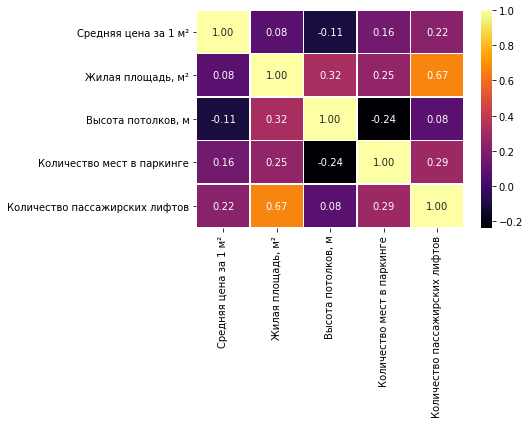

In [56]:
Visualizer(data).make_heatmap()
# Вывод:
# 1) Было выбрано несколько фичей для нахождения корреляции. Самая сильная корреляция (R = 0.67) прослеживается
# между жилой площадью и кол-во лифтов. Логично, что чем больше живет человек, тем больше требуется лифтов для их перевозок
# чтобы увеличить скорость пермещения между этажами

# 2) Наблюдается зависимость между высотой потолка и жилой площадью, а также кол-во мест на паркинге и жилой площадью.

# 3) Средняя цена слабо коррелирует с жил площадью, но средне коррелирует с кол-вом мест на паркинге и кол-вом лифтов.
# скорее всего есть это элитное жилье где есть доп признаки (район, вид дома и тд)